In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [14]:
df = pd.read_csv('/content/Google_Stock_Price_Train.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [15]:
# Remove commas and convert to floats
df['Close'] = df['Close'].str.replace(',', '').astype(float)

# Extract the 'Close' prices as the target variable
dataset = df['Close'].values.reshape(-1, 1)

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [16]:
# Split the dataset into training and testing sets
train_size = int(len(dataset) * 0.8)
train_data = dataset[:train_size]
test_data = dataset[train_size:]

In [17]:
# Create the input sequences for the RNN
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [18]:
# Build the RNN model
model = Sequential()
model.add(LSTM(64, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
32/32 [==============================] - 2s 6ms/step - loss: 0.0365
Epoch 2/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0046
Epoch 3/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 4/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 5/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 6/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 7/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0030
Epoch 8/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 9/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 10/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0026
Epoch 11/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 12/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 13/20
32/32 [==============================

In [20]:
# Evaluate the model on the testing set
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

8/8 [==============================] - 0s 3ms/step - loss: 4.0506e-04
Test Loss: 0.0004050627467222512


In [21]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

8/8 [==============================] - 0s 2ms/step


In [22]:
# Inverse scale the predictions and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

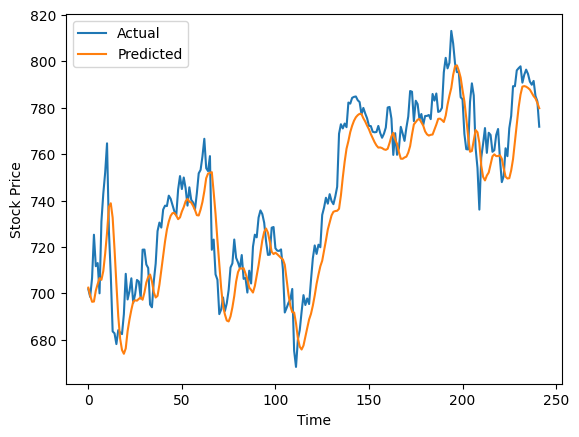

In [23]:
# Plot the predicted and actual values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()